In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split

In [3]:
# Import the data
file_path = "Resources/lending_data.csv"
df = pd.read_csv(file_path)

## Logistic Regression

In [4]:
# Define the X (features) and y (target) sets
y = df["loan_status"].values
X = df.drop("loan_status", axis=1)

#### Split our data into training and testing data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

#### Create a logistic regression model

In [6]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

#### fit (train) our model by using the training data

In [8]:
classifier.fit(X_train, y_train)

LogisticRegression()

#### Validate the model by using the test data

In [9]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9921240885954051
Testing Data Score: 0.9918489475856377


#### Confusion Matrix

In [11]:
from sklearn.metrics import confusion_matrix

In [12]:
y_true = y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[18663,   102],
       [   56,   563]])

In [13]:
confusion_matrix(y,classifier.predict(X))

array([[74657,   379],
       [  237,  2263]])

## Random Forest Classifier

In [14]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [16]:
# Create the data
X, y = make_classification(random_state = 14, n_features = 7, n_redundant=0)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
clf = RandomForestClassifier(random_state=1, n_estimators = 500).fit(X_train_scaled, y_train)
print(f"Training Score: {clf.score(X_train_scaled, y_train)}")
print(f"Testing Score: {clf.score(X_test_scaled, y_test)}")

Training Score: 1.0
Testing Score: 0.84


[0.10932157 0.1099334  0.08545412 0.35819543 0.14146392 0.10422736
 0.09140419]


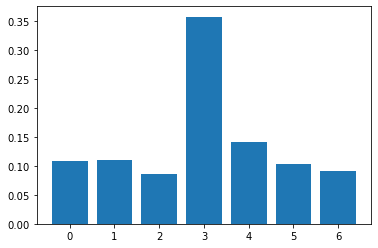

In [18]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [19]:
from sklearn.feature_selection import SelectFromModel

In [20]:
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([False, False, False,  True, False, False, False])

In [21]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X),y,random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [22]:
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f"Training Score: {clf.score(X_train_scaled, y_train)}")
print(f"Testing Score: {clf.score(X_test_scaled, y_test)}")

Training Score: 0.7866666666666666
Testing Score: 0.92


## Analysis
For this project we ran two tests a Logistical Regression and Random Forest Classifier

#### Logistic regression
- For our logistic regression our training data score was a 0.99212 and our test data score was 0.99184
- This shows us that our training and testing model was accurate for both and would be reliable for use

#### Random Forest Classifier
- Our Random Forest Classifier our training score was a 0.78666 and a testing score of 0.92
- Which means our Random Forest Classifier is still fairly accurate and is not over trained

This means that the Logistic regression performs better. I thought that would be the case as Logistic Regression is usually used for classification and prediction problems. This test is also known to be going at predicting binary results like yes or no and that is what we were going for.